In [12]:
!hydromt --help

Usage: hydromt [OPTIONS] COMMAND [ARGS]...

  Command line interface for hydromt models.

Options:
  --version  Show the version and exit.
  --models   Print availabe model plugins and exit.
  --help     Show this message and exit.

Commands:
  build   Build models
  clip    Clip models.
  update  Update models


In [13]:
!hydromt --models

hydroMT model plugins: sfincs (v0.2.1)


In [3]:
!hydromt build --help

Usage: hydromt build [OPTIONS] MODEL MODEL_ROOT REGION

  Build models from source data.

  Example usage:
  --------------

  To build a wflow model for a subbasin using and point coordinates snapped to cells with stream order >= 4
  hydromt build wflow /path/to/model_root "{'subbasin': [-7.24, 62.09], 'strord': 4}" -i /path/to/wflow_config.ini

  To build a wflow model based on basin ID
  hydromt build wflow /path/to/model_root "{'basin': 230001006}"

  To build a sfincs model based on a bbox (for Texel)
  hydromt build sfincs /path/to/model_root "{'bbox': [4.6891,52.9750,4.9576,53.1994]}"

Options:
  -r, --res FLOAT             Model resolution in model src.
  --build-base / --build-all  Deprecated!
  --opt TEXT                  Component specific keyword arguments, see the
                              setup_<component> method of the specific model
                              for more information about the arguments.
  -i, --config PATH           Path to hydroMT configuration fil

In [4]:
!hydromt build sfincs ./sfincs_bangkok "{'bbox': [100.324195,13.464949,100.695671,13.896177]}" --dd -vv

2022-04-19 14:27:00,824 - build - log - DEBUG - Writing log messages to new file C:\Users\beveren\msc_thesis\hydromt_sfincs-main\Case_studies\sfincs_bangkok\hydromt.log.
2022-04-19 14:27:00,824 - build - log - INFO - HydroMT version: 0.4.5
2022-04-19 14:27:00,824 - build - main - INFO - Building instance of sfincs model at C:\Users\beveren\msc_thesis\hydromt_sfincs-main\Case_studies\sfincs_bangkok.
2022-04-19 14:27:00,824 - build - main - INFO - User settings:
2022-04-19 14:27:00,834 - build - model_plugins - DEBUG - Loaded model plugin 'sfincs = hydromt_sfincs.sfincs.SfincsModel' (0.2.1)
2022-04-19 14:27:00,834 - build - model_api - INFO - Initializing sfincs model from hydromt_sfincs (v0.2.1).
2022-04-19 14:27:00,834 - build - data_adapter - INFO - Adding deltares_data v0.0.6 sources from https://github.com/DirkEilander/hydromt-artifacts/releases/download/v0.0.6/deltares_data.yml
2022-04-19 14:27:01,574 - build - model_api - WARNING - Model dir already exists and files might be overw

In [3]:
fn_ini = "sfincs_bangkok_fab.ini"
with open(fn_ini, "r") as f:
    txt = f.read()
print(txt)

[setup_config]
tref = 20100201 000000
tstart = 20100201 000000
tstop = 20100210 000000
alpha = 0.5
zsini = 0.5

[setup_topobathy]
topobathy_fn = fabdem           # topobathy basemaps ['elevtn']
crs = utm                       # model CRS (must be UTM zone)

[setup_mask]
exclude_mask_fn = osm_coastlines

[setup_river_hydrography]       # required for setup_river_bathymetry & used by setup_river_inflow & setup_river_outflow if no hydrography_fn passed to those methods
hydrography_fn = merit_hydro    # hydrography maps ['flwdir', 'uparea']

[setup_river_bathymetry]
river_geom_fn = rivers_lin2019_v1  # river geometry with columns ['qbankfull', 'rivwth']
river_upa = 25                   # Mimimum upstream area threshold of rivers [km2]
river_len = 1000                 # minimum length inside river domain [m] 
rivdph_method=gvf                # gradual varying flow method
rivwth_method=geom               # with based on values from river_geom_fn
min_rivwth=50.0                  # minimum riv

In [4]:
!hydromt build sfincs ./sfincs_bangkok "{'bbox': [100.324195,13.464949,100.695671,13.896177]}" -r 150 -i sfincs_bangkok_fab.ini --dd -vv

2022-06-01 15:04:51,767 - build - log - DEBUG - Writing log messages to new file \\storage009.directory.intra\11206881-climate-risk-in-cities\msc_theses\Jasper\hydromt_sfincs-main\Case_studies\sfincs_bangkok\hydromt.log.
2022-06-01 15:04:51,771 - build - log - INFO - HydroMT version: 0.4.6.dev
2022-06-01 15:04:51,771 - build - main - INFO - Building instance of sfincs model at \\storage009.directory.intra\11206881-climate-risk-in-cities\msc_theses\Jasper\hydromt_sfincs-main\Case_studies\sfincs_bangkok.
2022-06-01 15:04:51,777 - build - main - INFO - User settings:
2022-06-01 15:04:52,021 - build - model_plugins - DEBUG - Loaded model plugin 'sfincs = hydromt_sfincs.sfincs.SfincsModel' (0.2.1)
2022-06-01 15:04:52,047 - build - data_adapter - INFO - Adding deltares_data v0.0.6 sources from https://github.com/DirkEilander/hydromt-artifacts/releases/download/v0.0.6/deltares_data.yml
2022-06-01 15:04:53,047 - build - model_api - WARNING - Model dir already exists and files might be overwrit

The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.


fn_inp = "./sfincs_bangkok/sfincs.inp"
with open(fn_inp, "r") as f:
    txt = f.read()

print(txt)

In [5]:
%matplotlib inline
from hydromt_sfincs import SfincsModel

Overwriting data source era5_hourly.
Overwriting data source fabdem.
Overwriting data source gcn250.
Overwriting data source merit_hydro.
Overwriting data source osm_coastlines.
Overwriting data source rivers_lin2019_v1.
Overwriting data source vito.


(<Figure size 1152x864 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'SFINCS dep map'}, xlabel='x coordinate UTM zone 47N [m]', ylabel='y coordinate UTM zone 47N [m]'>)

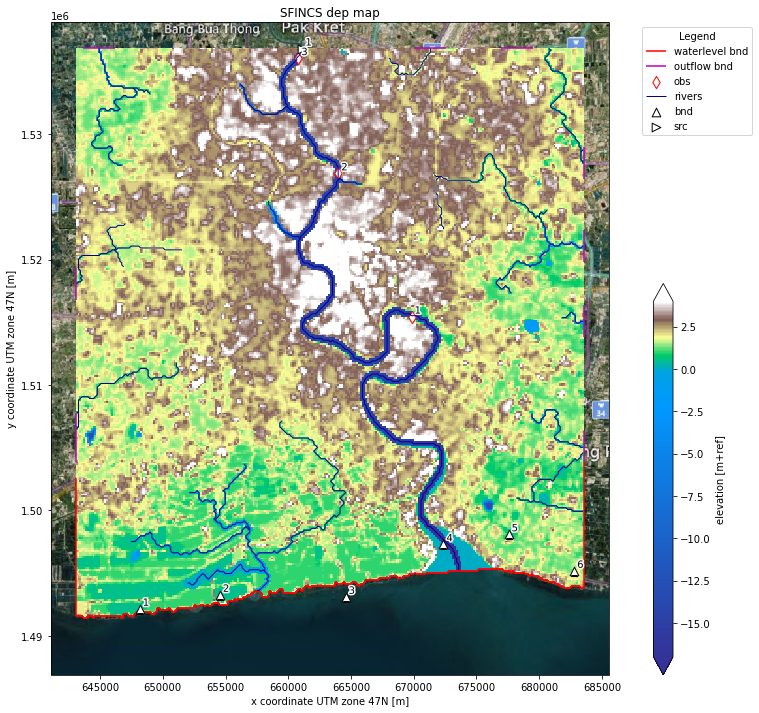

In [6]:
# define the model's configuration file
root = r"./sfincs_bangkok"

# read the model with hydromt methods
mod = SfincsModel(root=root, mode="r+", deltares_data= True)
mod.read()
mod.plot_basemap(figsize=(16, 12), shaded=False)

(<Figure size 432x648 with 3 Axes>,
 array([<AxesSubplot:title={'center':'SFINCS waterlevel forcing (bzs)'}, ylabel='waterlevel\n[m+ref]'>,
        <AxesSubplot:title={'center':'SFINCS discharge forcing (dis)'}, ylabel='discharge\n[m3.s-1]'>,
        <AxesSubplot:title={'center':'SFINCS precipitation forcing (precip)'}, ylabel='precipitation\n[mm.hr-1]'>],
       dtype=object))

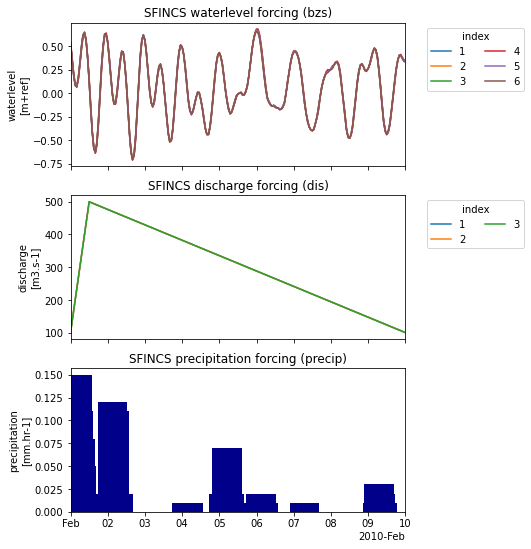

In [9]:
mod.plot_forcing()